In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

# Load in scraped data csv and describe()


In [4]:
all_data = pd.read_csv('./Data/all_movie_data_cleaned.csv')
all_data.describe()

,Release_month,Running_time_min,Budget,Box_office,Box_office_opening
count,6717.000000,7060.000000,4.972000e+03,5.126000e+03,6.431000e+03
mean,6.561560,105.034136,3.820394e+07,1.119905e+08,1.170468e+07
std,3.443663,21.323488,4.328972e+07,2.018515e+08,2.136402e+07
min,1.000000,1.000000,2.183200e+02,4.960000e+03,9.500000e+01
25%,4.000000,92.000000,1.100000e+07,1.140000e+07,1.702000e+05
50%,7.000000,102.000000,2.475000e+07,4.130000e+07,4.765838e+06
75%,9.000000,114.000000,5.000000e+07,1.222000e+08,1.373526e+07
max,12.000000,421.000000,4.440000e+08,2.847000e+09,3.571150e+08


In [6]:
all_data.sum()[['Budget','Box_office']]

Budget        189949985979.820007
Box_office    574063234637.880005
dtype: object



# 	**Create correlation heatmap for relevant indicators**
#### - Production Budget(Budget), Total Box Office(Box_office), and Opening Box Office(Box_office_opening) all highly correlated.
#### - Run time(Running_time_min) correlates most with Production Budget but not much with other variables.



<AxesSubplot:>

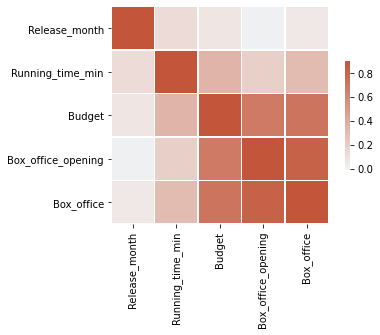

In [10]:
# create correlation matrix
corr_matrix = all_data[['Release_month', 'Running_time_min', 'Budget', 'Box_office_opening', 'Box_office']].corr()

# create dataframe correlation heatmap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Aggregate values for each relevant indicator

## No. of Lead Actor credits aggregated by actor over the period 1990-2019


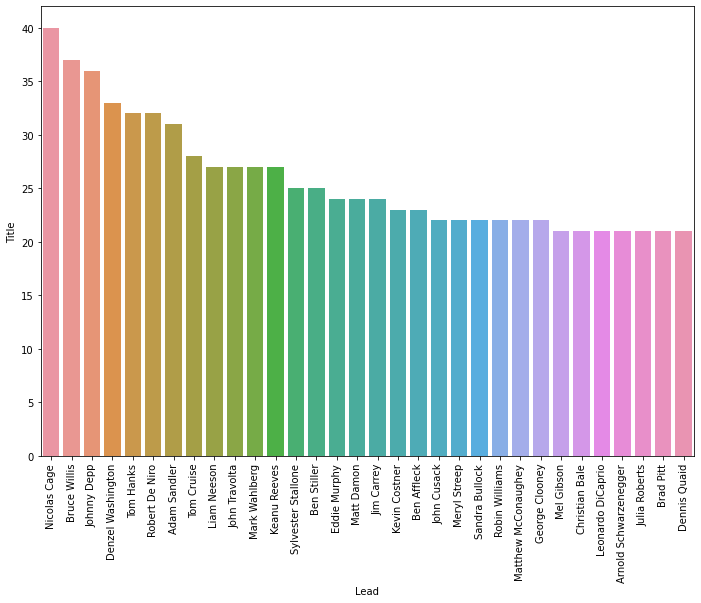

In [14]:
# select actors who appeared in a WB movie more than 3 times
actors_freq = all_data.groupby('Lead').count()
actors = actors_freq[actors_freq['Title'] > 20]
actors = actors[['Title']].sort_values(by=['Title'], ascending=False)

# create seaborn barplot with x = actors, y = #of occurences
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
chart = sns.barplot(x=actors.index, y=actors['Title'], ax=ax)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()


## Total Box office and Opening Box office aggregated by release month over the period 1990-2019


               Box_office_opening    Box_office
Release_month                                  
1.0                  4.086457e+09  2.323398e+10
2.0                  5.459346e+09  3.046566e+10
3.0                  6.315032e+09  3.768348e+10
4.0                  6.058632e+09  4.247539e+10
5.0                  8.931620e+09  7.270197e+10
6.0                  8.534458e+09  7.799993e+10
7.0                  6.535403e+09  5.391808e+10
8.0                  5.061613e+09  3.479193e+10
9.0                  5.257098e+09  3.639146e+10
10.0                 5.108521e+09  3.846273e+10
11.0                 6.453407e+09  5.839525e+10
12.0                 5.508314e+09  6.665211e+10


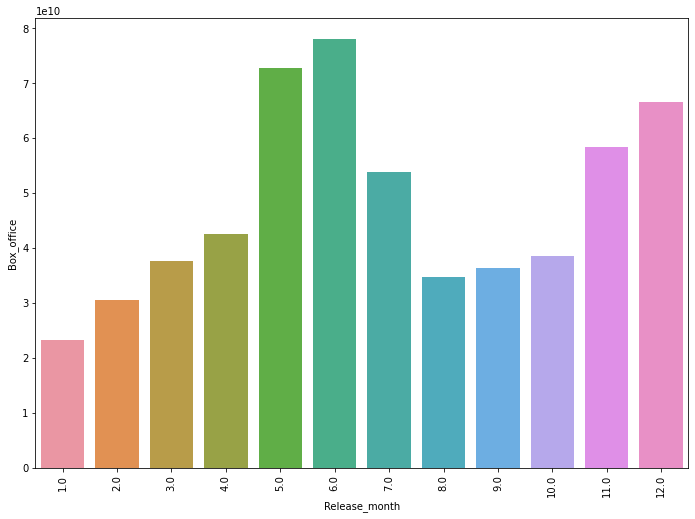

In [15]:
# aggregate box office metrics by release months
box_bymonth = all_data.groupby('Release_month').sum()[['Box_office_opening','Box_office']]
print(box_bymonth)

# create seaborn barplot with x = release month, y = total box office, opening box office
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
chart = sns.barplot(x=box_bymonth.index, y=box_bymonth['Box_office'], ax=ax)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

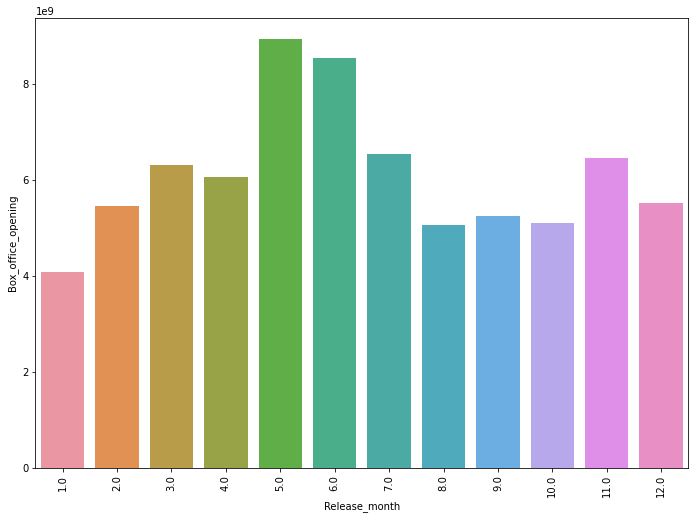

In [16]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
chart = sns.barplot(x=box_bymonth.index, y=box_bymonth['Box_office_opening'], ax=ax)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

# Highest performing Lead actors measured by aggregate total box office per actor


In [17]:
actors_revenue = all_data.groupby('Lead').sum()
actors_revenue = actors_revenue[['Box_office']].sort_values(by=['Box_office'], ascending=False)
actors_revenue

,Box_office
Lead,
Robert Downey Jr.,1.160910e+10
Tom Hanks,9.836800e+09
Tom Cruise,9.745000e+09
Leonardo DiCaprio,9.162400e+09
Johnny Depp,8.658200e+09
...,...
Najarra Townsend,0.000000e+00
Nana Patekar,0.000000e+00
Nancy Allison Wolfe,0.000000e+00
